# Random Ballistic Deposition
## Imports and config

In [1]:
from random_ballistic_deposition import random_ballistic_deposition
from matplotlib import rcParams, cm, pyplot as plt
import numpy as np

directory = "../fig/random-ballistic-deposition/"
rcParams['text.usetex'] = True

## Simulation
### Run New Simulation

In [2]:
length = 200
layers = 20

surface = np.zeros(length, dtype=int)
layer_heights = random_ballistic_deposition(surface, 100 * length * layers, layers)

In [3]:
# save simulation to file
max_digits = len(str(layer_heights.max()))
np.savetxt("simulation_data.txt", layer_heights, fmt=f"%{max_digits}d")

### Load Results of Previous Run

In [4]:
layer_heights = np.loadtxt("simulation_data.txt")

## Visualization

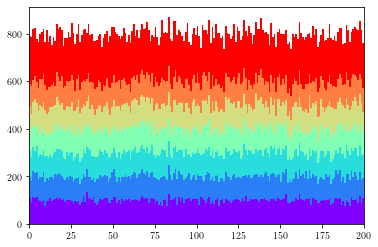

In [5]:
x = np.linspace(0.5, length - 0.5, length)
cmap = cm.get_cmap("rainbow")

plt.xlim(0, length)
for i in range(7, -1, -1):
    plt.bar(x, layer_heights[i], width=1, color=cmap(i / 6))
plt.savefig(directory + "vis.pdf", bbox_inches="tight")

## Analysis
### Mean Height

In [6]:
times = np.linspace(100 * length, 100 * length * layers, layers)
means = layer_heights.mean(axis=1)
means_fit, residuals, _, _, _ = np.polyfit(times, means, 1, full=True)
slope = means_fit[0]
error = (residuals[0] / (len(means) - 2) / np.sum((times - times.mean()) ** 2)) ** 0.5
slope, error

(0.005, 5.343982585939039e-19)

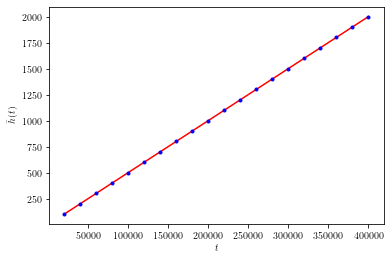

In [7]:
fit = means_fit[0] * times + means_fit[1]

plt.plot(times, fit, 'r')
plt.plot(times, means, 'b.')

plt.xlabel(r"$t$")
plt.ylabel(r"$\bar{h}(t)$")
plt.savefig(directory + "means.pdf", bbox_inches="tight")

### Standard Deviation of Heights

In [8]:
deviations = layer_heights.std(axis=1)
deviations_log = np.log10(deviations)
times_log = np.log10(times)
deviations_fit, residuals, _, _, _ = np.polyfit(times_log, deviations_log, 1, full=True)
dynamic_growth_exponent = deviations_fit[0]
error = (residuals[0] / (len(deviations_log) - 2)
         / np.sum((times_log - times_log.mean()) ** 2)) ** 0.5
dynamic_growth_exponent, error

(0.5072399521682067, 0.006707580644035795)

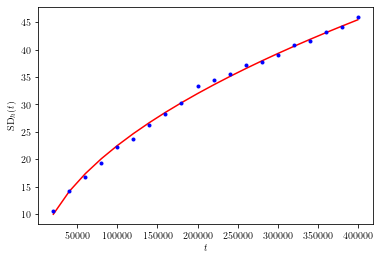

In [11]:
fit = times ** deviations_fit[0] * 10 ** deviations_fit[1]

plt.plot(times, fit, 'r')
plt.plot(times, deviations, 'b.')

plt.xlabel(r"$t$")
plt.ylabel(r"$\mathrm{SD}_h(t)$")
plt.savefig(directory + "deviations.pdf", bbox_inches="tight")

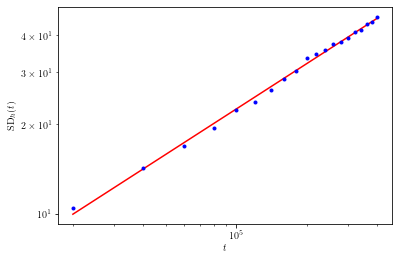

In [12]:
plt.loglog(times, fit, 'r')
plt.loglog(times, deviations, 'b.')

plt.xlabel(r"$t$")
plt.ylabel(r"$\mathrm{SD}_h(t)$")
plt.savefig(directory + "deviations-loglog.pdf", bbox_inches="tight")